In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Import the data
# Set the thousand separator to '.' and the decimal separator to ',' (prevents recognizing data as string)
# keep employee id (guaranteed_price_provider) as object
cars_df = pd.read_csv('C:/Users/grezs/Desktop/Rencool/Copenhagen/Job hunt/trial work/AUTOproff/case_data.csv', 
                      dtype={'guaranteed_price_provider': 'object'}, thousands='.', decimal=',')

In [2]:
# Convert everything to integer so all numerical data have the same data type
cars_df['guarantee_bid_price (DKK)'] = cars_df['guarantee_bid_price (DKK)'].astype('int64')

# Impute null values. No info on reason, so we will use 0 for convenience.
cars_df['minimum_price'] = cars_df['minimum_price'].fillna(0)
cars_df['minimum_price'] = cars_df['minimum_price'].astype('int64')

In [3]:
# Create a column to represent the deviance of the Selling Price from the Guaranteed Price
cars_df['GP_difference'] = cars_df['sold_price']-cars_df['guarantee_bid_price (DKK)']

# Add a column to indicate if GP or SP is higher (or equal)
cars_df['GP_vs_SP'] = ''

for i, row in cars_df.iterrows():
    val = row['GP_difference']
    
    if val > 0:
        cars_df.at[i, 'GP_vs_SP'] = 'SP higher'
    elif val == 0:
        cars_df.at[i, 'GP_vs_SP'] = 'equal'
    elif val < 0:
        cars_df.at[i, 'GP_vs_SP'] = 'GP higher'

In [4]:
# Distribution of GP vs SP
cars_df['GP_vs_SP'].value_counts(normalize=True)

SP higher    0.808731
equal        0.106784
GP higher    0.084485
Name: GP_vs_SP, dtype: float64

In [5]:
cars_df['guarantee_bid_status'].value_counts(normalize=True)

Accepted    0.576947
Declined    0.423053
Name: guarantee_bid_status, dtype: float64

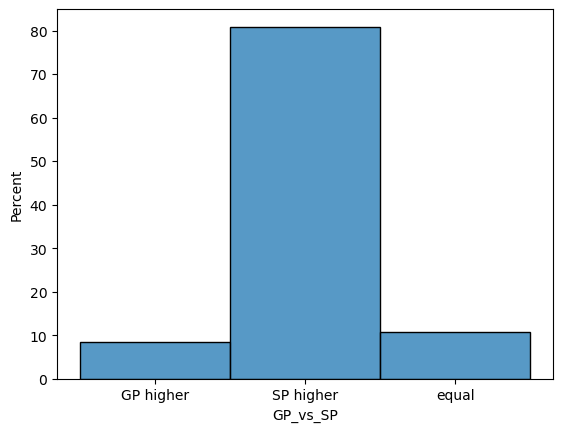

In [6]:
# Distribution of GP vs SP
import matplotlib.pyplot as plt
import seaborn

seaborn.histplot(data=cars_df, x = 'GP_vs_SP', stat='percent')
plt.show()

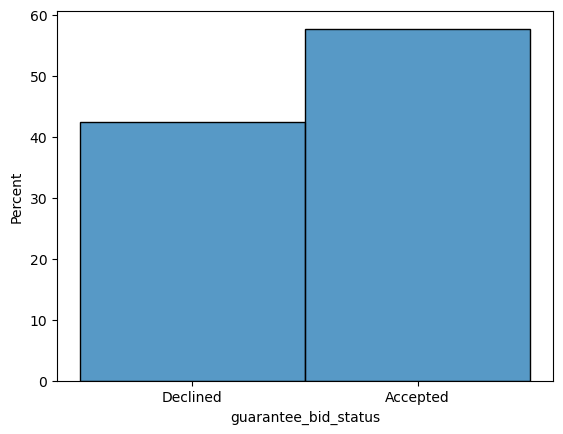

In [7]:
# What is the percentage of GP accepted?
import matplotlib.pyplot as plt
import seaborn

seaborn.histplot(data=cars_df, x = 'guarantee_bid_status', stat='percent')
plt.show()

In [112]:
cars_df.to_csv('C:/Users/grezs/Desktop/Rencool/Copenhagen/Job hunt/trial work/AUTOproff/case_data_manipulated.csv')

In [8]:
# Convert Acceptance into binary
cars_df['Acceptance'] = ''

for i, row in cars_df.iterrows():
    val = row['guarantee_bid_status']
    
    if val == 'Accepted':
        cars_df.at[i, 'Acceptance'] = 1
    elif val == 'Declined':
        cars_df.at[i, 'Acceptance'] = 0
        
cars_df['Acceptance'] = cars_df['Acceptance'].astype('int64')

<function matplotlib.pyplot.show(close=None, block=None)>

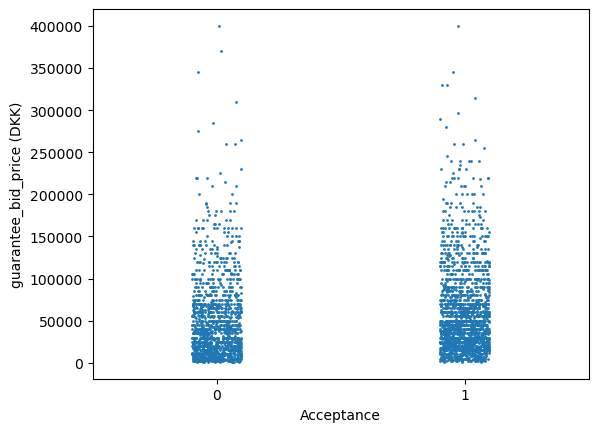

In [16]:
seaborn.stripplot(data=cars_df, x='Acceptance', y='guarantee_bid_price (DKK)', size=2)
plt.show

In [9]:
from scipy import stats
corr_pear = stats.pearsonr(cars_df['guarantee_bid_price (DKK)'], cars_df['Acceptance'])
corr_pear

PearsonRResult(statistic=0.10094359511810463, pvalue=1.141187673054435e-08)

In [10]:
from scipy import stats
corr_spear = stats.spearmanr(cars_df['guarantee_bid_price (DKK)'], cars_df['Acceptance'])
corr_spear

SignificanceResult(statistic=0.13163168780269766, pvalue=8.843066159627033e-14)

In [11]:
from scipy import stats
corr_kend = stats.kendalltau(cars_df['guarantee_bid_price (DKK)'], cars_df['Acceptance'])
corr_kend

SignificanceResult(statistic=0.10848834642401636, pvalue=1.1158696542447701e-13)

In [ ]:
## Pearsons correlation analysis resulted in little correlation
## As it is not enough to discard the possibility of corelation (as it might be non-linear), I checked 
## Spearman's and Kendall's correlation as well. Both of them resulted in little correlation.

## Based on the correlation analysis, there is a positive but weak correlation between the variables. 